In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import lightgbm as lgb
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv("/Users/nataliechang/Desktop/Eluvio_DS_Challenge.csv")

In [3]:
data = data.drop(columns=['time_created', 'date_created', 'down_votes','category'])
data.head()

,up_votes,title,over_18,author
0,3,Scores killed in Pakistan clashes,False,polar
1,2,Japan resumes refuelling mission,False,polar
2,3,US presses Egypt on Gaza border,False,polar
3,1,Jump-start economy: Give health care to all,False,fadi420
4,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans


In [4]:
set(data['over_18'])

{False, True}

In [5]:
data['over_18'].value_counts()

False    508916
True        320
Name: over_18, dtype: int64

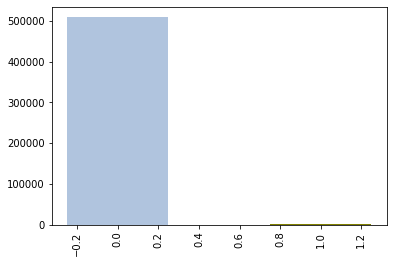

In [6]:
plt.bar(data['over_18'].unique(),
        data['over_18'].value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue',  
               'olive'])
plt.xticks(rotation='vertical')
plt.show()

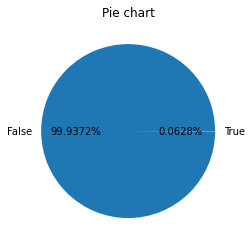

In [7]:
count_Class=pd.value_counts(data['over_18'], sort= True)
count_Class.plot(kind = 'pie',autopct='%1.4f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [8]:
from collections import Counter
word_counts = Counter(list(data['author']))

top_three = word_counts.most_common(50)
print(top_three)

[('davidreiss666', 8897), ('anutensil', 5730), ('DoremusJessup', 5037), ('maxwellhill', 4023), ('igeldard', 4013), ('readerseven', 3170), ('twolf1', 2923), ('madam1', 2658), ('nimobo', 2564), ('madazzahatter', 2503), ('ionised', 2493), ('NinjaDiscoJesus', 2448), ('bridgesfreezefirst', 2405), ('SolInvictus', 2181), ('Libertatea', 2108), ('vigorous', 2077), ('galt1776', 1897), ('DougBolivar', 1770), ('bob21doh', 1698), ('trot-trot', 1649), ('DrRichardCranium', 1616), ('pnewell', 1562), ('XKryptonite', 1516), ('Wagamaga', 1490), ('scienceben', 1399), ('pool92', 1397), ('EightRoundsRapid', 1223), ('kulkke', 1199), ('PanAfrica', 1183), ('mortalaa', 1180), ('LuckyBdx4', 1170), ('emr1028', 1094), ('alllie', 1092), ('misterAction', 1016), ('redhatGizmo', 1012), ('silence_hr', 1000), ('commonsenseIR', 994), ('Ze_Carioca', 979), ('BlankVerse', 970), ('oshunsmall', 962), ('i_love_fsa', 952), ('User_Name13', 938), ('Another-Chance', 936), ('MrTulip', 915), ('Kaffir', 903), ('conuly', 892), ('elusi

Label encoding - author

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
data['author'] = labelencoder.fit_transform(data['author'])
data['over_18'] = labelencoder.fit_transform(data['over_18'])
data

,up_votes,title,over_18,author
0,3,Scores killed in Pakistan clashes,0,69315
1,2,Japan resumes refuelling mission,0,69315
2,3,US presses Egypt on Gaza border,0,69315
3,1,Jump-start economy: Give health care to all,0,47884
4,4,Council of Europe bashes EU&UN terror blacklist,0,62766
...,...,...,...,...
509231,5,Heil Trump : Donald Trump s alt-right white...,0,66229
509232,1,There are people speculating that this could b...,0,28544
509233,1,Professor receives Arab Researchers Award,0,1240
509234,1,Nigel Farage attacks response to Trump ambassa...,0,75836


In [10]:
from collections import Counter
word_counts = Counter(list(data['author']))

top_three = word_counts.most_common(50)
print(top_three)

[(44158, 8897), (36192, 5730), (8612, 5037), (62103, 4023), (53662, 4013), (71090, 3170), (81403, 2923), (61021, 2658), (65916, 2564), (61028, 2503), (54431, 2493), (21504, 2448), (39863, 2405), (27666, 2181), (17720, 2108), (82488, 2077), (49717, 1897), (8653, 1770), (39247, 1698), (81054, 1649), (8753, 1616), (69234, 1562), (32872, 1516), (32118, 1490), (73894, 1399), (69421, 1397), (9342, 1223), (58836, 1199), (22798, 1183), (63917, 1180), (18257, 1170), (47140, 1094), (35245, 1092), (63277, 1016), (71409, 1012), (75117, 1000), (42527, 994), (33368, 979), (4260, 970), (67586, 962), (53305, 952), (31546, 938), (2450, 936), (20511, 915), (16186, 903), (42652, 892), (47010, 886), (81891, 883), (46265, 863), (38860, 851)]


In [11]:
data[data['author']==44158]

,up_votes,title,over_18,author
8376,0,Algerian Christian converts found guilty of wo...,0,44158
10020,3,Update on the people of the Former Soviet Unio...,0,44158
10218,6,From Canada: Court ruling said that four Canad...,0,44158
10977,0,A report commissioned by the Church of England...,0,44158
11112,4,G8 heads urge African leaders to oust Mugabe,0,44158
...,...,...,...,...
486420,3,France s Sarkozy to run for 2017 presidential ...,0,44158
486441,8,Iran’s defense minister criticized Russia for ...,0,44158
490008,1,Russia and Saudi Arabia pledge to curb excess...,0,44158
490131,7,Swedish Nobel judges fired in Karolinska medic...,0,44158


In [12]:
data[data['over_18']==1]

,up_votes,title,over_18,author
1885,189,Pics from the Tibetan protests - more graphic ...,1,69702
6721,5,"MI5 linked to Max Mosley’s Nazi-style, sadomas...",1,35245
8414,0,Tabloid Horrifies Germany: Poland s Yellow Pre...,1,77160
12163,0,Love Parade Dortmund: Techno Festival Breaks R...,1,77160
12699,5,IDF kills young Palestinian boy. Potentially N...,1,43329
...,...,...,...,...
503776,4,Latest Italian Earthquake Devastates Medieval ...,1,69038
508067,12,ISIS Release Video Showing Melbourne As A Poss...,1,51549
508176,0,Animal welfare activists have released footage...,1,21504
508376,6,Jungle Justice : Public lynching of a street ...,1,37160


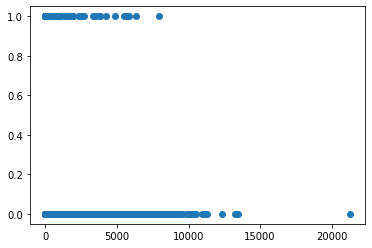

In [13]:
plt.scatter(data['up_votes'],data['over_18'])

In [14]:
data_upvote = data.groupby(['up_votes'],as_index=False)['up_votes'].agg({'cnt':'count'})

(array([2.120e+03, 1.898e+03, 1.311e+03, 4.090e+02, 3.700e+01, 4.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  2125.3,  4250.6,  6375.9,  8501.2, 10626.5, 12751.8,
        14877.1, 17002.4, 19127.7, 21253. ]),
 <BarContainer object of 10 artists>)

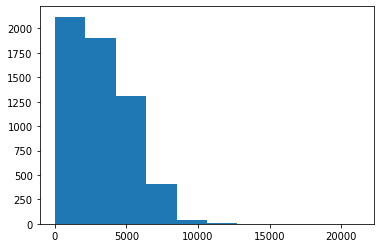

In [15]:
plt.hist(data_upvote['up_votes'],bins=10)

In [16]:
def binned(data,col,n):
    data[col] = pd.qcut(data[col], n, labels=[0,1,2,3,4], duplicates='drop')
    return data

In [17]:
binned(data,'up_votes',5)

,up_votes,title,over_18,author
0,1,Scores killed in Pakistan clashes,0,69315
1,1,Japan resumes refuelling mission,0,69315
2,1,US presses Egypt on Gaza border,0,69315
3,0,Jump-start economy: Give health care to all,0,47884
4,2,Council of Europe bashes EU&UN terror blacklist,0,62766
...,...,...,...,...
509231,2,Heil Trump : Donald Trump s alt-right white...,0,66229
509232,0,There are people speculating that this could b...,0,28544
509233,0,Professor receives Arab Researchers Award,0,1240
509234,0,Nigel Farage attacks response to Trump ambassa...,0,75836


In [18]:
data[data['up_votes']==3]

,up_votes,title,over_18,author
5,3,Hay presto! Farmer unveils the illegal mock-...,0,2750
11,3,Top US Envoy: Violence In Kenya Is Ethnic Cle...,0,75754
51,3,Russia is steadily unravelling the historic ...,0,75117
53,3,Multiple Impeachment Resolutions pass in Minne...,0,19722
71,3,Modern Slavery: A world map,0,45199
...,...,...,...,...
509188,3,World s First Head Transplant Will Use Virtual...,0,27002
509190,3,US leaving TPP: A great news day for China,0,72843
509191,3,56-car pileup in China leaves 17 dead,0,17603
509200,3,Extraordinarily hot Arctic temperatures alar...,0,70975


Text processing - Word2Vec

In [19]:
from gensim.models import Word2Vec
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [20]:
def cleanText(data):
    stemmer = SnowballStemmer("english")
    text = data['title']
    text2 = []
    for i in range(len(data)):
        tokens = word_tokenize(text[i])
        # stemming of words
        porter = PorterStemmer()
        stemmed = [porter.stem(word) for word in tokens]
        text2.append(stemmed)
    return text2

In [21]:
def build_sentence_vector(sentence,size,w2v_model):
    sen_vec = np.random.uniform(0,1/size,size).reshape((1,size))
    count = 0
    for word in sentence:
        try:
            sen_vec += w2v_model[word].reshape((1,size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        sen_vec /= count
    return sen_vec

In [22]:
def new_dataset(data):
    dataset = cleanText(data)
    n_dim = 50
    w2v_model = Word2Vec(dataset, sg=1, size=n_dim, min_count=10, hs=0)
    w2v_model.save('w2v_model')
    #w2v_model['i']

    data_list = []
    for i in range(len(data)):
        data_list.append(str(dataset[i]))
    docvec_list = np.concatenate([build_sentence_vector(sen,50,w2v_model) for sen in data_list])
    
    #class_mapping = {label: idx for idx, label in enumerate(np.unique(data['issue']))}
    #data['issue'] = data['issue'].map(class_mapping)
    #class_mapping2 = {label: idx for idx, label in enumerate(np.unique(train_data['author']))}
    #data['author'] = data['author'].map(class_mapping2)
    
    docvec_list = pd.DataFrame(docvec_list)
    #train_docvec_list
    new_data = data.iloc[:,[0,2,3]]
    #new_train_data
    new_data2 = pd.concat([new_data,docvec_list], axis=1)
    return new_data2

In [23]:
data2 = new_dataset(data)

<ipython-input-21-b57e5f515189>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sen_vec += w2v_model[word].reshape((1,size))


In [24]:
data2

,up_votes,over_18,author,0,1,2,3,4,5,6,...,40,41,42,43,44,45,46,47,48,49
0,1,0,69315,0.149951,-0.309804,0.053068,-0.195478,-0.020040,-0.161924,0.206661,...,-0.039971,-0.307264,-0.439363,0.058626,0.373890,-0.284521,-0.037034,0.042216,0.444392,0.045783
1,1,0,69315,0.144669,-0.330127,0.076521,-0.169386,-0.012910,-0.154428,0.274055,...,-0.069830,-0.279771,-0.475536,0.083134,0.372750,-0.255851,0.033878,0.049931,0.396190,-0.030318
2,1,0,69315,0.170655,-0.271334,0.017317,-0.185638,-0.042843,-0.127938,0.287196,...,0.006453,-0.221422,-0.401039,0.163903,0.264387,-0.197019,0.045713,0.016648,0.432313,0.012726
3,0,0,47884,0.184950,-0.276291,-0.001249,-0.258998,-0.060031,-0.140999,0.214015,...,-0.004785,-0.292948,-0.397717,0.106174,0.390870,-0.275081,0.030393,0.058101,0.416424,0.014475
4,2,0,62766,0.122735,-0.269080,0.011008,-0.192463,-0.062713,-0.147123,0.220722,...,0.015423,-0.279239,-0.400198,0.098884,0.399108,-0.228686,0.001161,-0.007358,0.406162,0.058114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509231,2,0,66229,0.231461,-0.347929,0.052184,-0.272103,-0.035624,-0.142766,0.187897,...,0.035441,-0.321656,-0.370335,0.033363,0.404436,-0.230973,0.001674,0.103671,0.424881,0.045652
509232,0,0,28544,0.200817,-0.290535,0.019384,-0.206598,-0.051020,-0.109301,0.217235,...,-0.019400,-0.257888,-0.387971,0.127178,0.443734,-0.253647,0.038418,0.022069,0.384433,0.003573
509233,0,0,1240,0.181824,-0.290775,0.033151,-0.148699,0.013341,-0.132439,0.265601,...,-0.049292,-0.225873,-0.412175,0.134706,0.328845,-0.241962,0.048982,0.056990,0.374050,-0.060671
509234,0,0,75836,0.244014,-0.289640,0.015115,-0.249521,0.001447,-0.116619,0.199687,...,0.000615,-0.291157,-0.372540,0.076378,0.396746,-0.194982,0.031660,0.081251,0.387554,-0.032465


<AxesSubplot:>

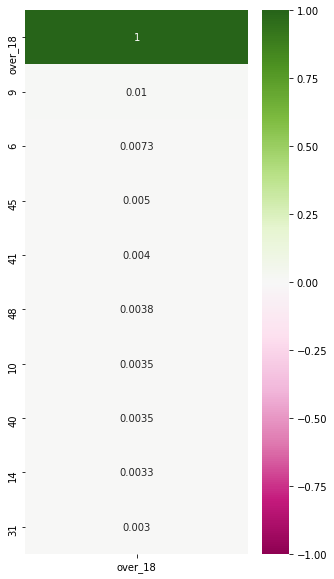

In [25]:
corr_new = data2.corr()
plt.figure(figsize=(5,10))
sb.heatmap(corr_new[['over_18']].sort_values(by=['over_18'],ascending=False).head(10),vmin=-1, cmap='PiYG', annot=True)

Model - predict up_vote 5 classes

In [85]:
import torch.nn as nn
import torch

In [86]:
X_train = np.array(data2.drop(columns=['up_votes']))
y = np.array(data2['up_votes'])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, X_train.shape[1]).astype('float32')
X_val = X_val.reshape(-1, X_val.shape[1]).astype('float32')

X_val = torch.from_numpy(X_val)
y_val = torch.from_numpy(y_val)

In [84]:
#from sklearn.datasets import load_iris
#iris = load_iris()
#X = iris.data
#Y = iris.target

#x, x_val, y, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)
#x_train = x.reshape(-1, x.shape[1]).astype('float32')
#y_train = y

#x_val = x_val.reshape(-1, x_val.shape[1]).astype('float32')
#y_val = y_val

#x_val = torch.from_numpy(x_val)
#y_val = torch.from_numpy(y_val)

In [90]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.from_numpy(X_train)
        self.y=torch.from_numpy(y_train)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [93]:
data_set = Data()
trainloader = DataLoader(dataset=data_set,batch_size=64)
data_set.x[1:2]

tensor([[ 0.0000e+00,  5.0880e+03,  1.6934e-01, -3.0181e-01,  7.6298e-03,
         -2.7247e-01, -4.8992e-02, -1.5970e-01,  2.0525e-01, -3.5052e-01,
         -2.0985e-02,  2.2222e-01, -1.9318e-01, -2.2749e-02,  9.1797e-02,
          1.1307e-02,  2.6055e-01, -1.2944e-01,  1.8155e-01, -1.6881e-02,
         -1.0134e-01, -2.0187e-01,  1.0731e-01,  1.1759e-03,  4.7323e-01,
         -4.1255e-01, -1.1680e-01,  4.2603e-02,  1.0862e-01,  1.0416e-01,
          1.7017e-02,  1.3563e-01, -2.7557e-02,  1.2451e-02,  2.9286e-01,
         -2.3054e-01,  1.5628e-03, -3.0322e-01, -2.1310e-02,  2.1867e-02,
          3.2169e-02,  2.2481e-01, -7.2451e-03, -3.1676e-01, -4.3256e-01,
          8.9402e-02,  3.4681e-01, -2.6536e-01, -1.4045e-02,  2.3219e-02,
          4.2717e-01,  1.1039e-02]])

In [94]:
data_set.y[1:10]

tensor([3, 3, 4, 4, 3, 1, 4, 1, 0])

In [95]:
data_set.x.shape, data_set.y.shape

(torch.Size([407388, 52]), torch.Size([407388]))

In [96]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x

In [97]:
input_dim = 52     # how many Variables are in the dataset
hidden_dim = 25 # hidden layers
output_dim = 5    # number of classes
input_dim

52

In [98]:
model = Net(input_dim,hidden_dim,output_dim)

In [99]:
print('W:',list(model.parameters())[0].size())
print('b',list(model.parameters())[1].size())

W: torch.Size([25, 52])
b torch.Size([25])


In [100]:
criterion = nn.CrossEntropyLoss()

In [101]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [102]:
n_epochs = 1000
loss_list = []

for epoch in range(n_epochs):
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z,y)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data) 
        #print('epoch {}, loss {}'.format(epoch, loss.item()))

In [103]:
z[0:10]

tensor([[ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392],
        [ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392],
        [ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392],
        [ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392],
        [ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392],
        [ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392],
        [ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392],
        [ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392],
        [ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392],
        [ 0.1932, -0.4636, -0.3834, -0.2305, -0.1392]],
       grad_fn=<SliceBackward>)

In [109]:
z = model(X_val)

In [110]:
yhat = torch.argmax(z.data,1)
yhat.tolist()
y_val.tolist()

[3,
 0,
 4,
 4,
 3,
 4,
 3,
 2,
 3,
 1,
 2,
 0,
 2,
 4,
 0,
 1,
 0,
 0,
 2,
 4,
 3,
 0,
 2,
 0,
 2,
 2,
 4,
 1,
 3,
 0,
 0,
 4,
 0,
 0,
 3,
 1,
 4,
 0,
 4,
 1,
 4,
 1,
 0,
 1,
 0,
 3,
 3,
 3,
 4,
 0,
 4,
 2,
 1,
 1,
 2,
 0,
 2,
 3,
 2,
 0,
 4,
 0,
 1,
 3,
 1,
 1,
 3,
 0,
 3,
 1,
 0,
 2,
 0,
 4,
 1,
 4,
 0,
 0,
 3,
 4,
 0,
 2,
 0,
 4,
 0,
 0,
 2,
 4,
 3,
 0,
 3,
 1,
 4,
 4,
 4,
 2,
 2,
 2,
 1,
 0,
 4,
 0,
 0,
 3,
 4,
 2,
 4,
 2,
 4,
 2,
 0,
 4,
 1,
 2,
 4,
 2,
 0,
 4,
 2,
 1,
 0,
 1,
 4,
 4,
 4,
 4,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 2,
 4,
 0,
 2,
 0,
 4,
 1,
 0,
 3,
 0,
 1,
 0,
 3,
 0,
 4,
 2,
 1,
 4,
 3,
 1,
 2,
 3,
 4,
 3,
 3,
 0,
 0,
 2,
 4,
 3,
 4,
 4,
 3,
 2,
 2,
 0,
 3,
 0,
 2,
 0,
 3,
 4,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 3,
 4,
 0,
 2,
 0,
 3,
 4,
 3,
 4,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 4,
 3,
 2,
 4,
 2,
 3,
 0,
 4,
 1,
 3,
 1,
 0,
 3,
 1,
 4,
 2,
 3,
 3,
 3,
 4,
 1,
 0,
 3,
 2,
 4,
 2,
 1,
 2,
 3,
 1,
 2,
 0,
 4,
 2,
 1,
 0,
 4,
 2,
 1,
 0,
 0,
 2,
 0,
 3,
 1,
 4,
 3,


In [111]:
print(f1_score(yhat,y_val,average='weighted'))
print(precision_score(yhat,y_val,average='weighted'))
print(recall_score(yhat,y_val,average='weighted'))

0.430886793615579
1.0
0.274605294163852


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model - predict over 18

In [108]:
X_train = data2.drop(columns=['over_18'])
y = data2['over_18']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=500, learning_rate=0.1, 
                                    max_depth=800, feature_fraction=0.8, subsample=0.2,
                                    is_unbalance=True)
lgb_classifier.fit(X_train,y_train)
y_head = lgb_classifier.predict(X_val)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [110]:
y_prob = lgb_classifier.predict_proba(X_val)

In [111]:
y_prob2 = []
for i in range(len(y_prob)):
    a = y_prob[i][0]
    y_prob2.append(a)

In [112]:
y_val = y_val.tolist()
y_head = y_head.tolist()

In [117]:
y_prob2 = [1 if x < 0.99 else 0 for x in y_prob2]

In [82]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
print(f1_score(y_val,y_head))
print(precision_score(y_val, y_head))
print(recall_score(y_val, y_head))
#print(precision_recall_fscore_support(y_val, y_head, average='weighted'))

print(f1_score(y_val,y_prob2))
print(precision_score(y_val, y_prob2))
print(recall_score(y_val, y_prob2))
#print(precision_recall_fscore_support(y_val, y_prob2, average='weighted'))

ValueError: Found input variables with inconsistent numbers of samples: [50, 101848]